In [1]:
import numpy as np  
import matplotlib.pyplot as plt  
import matplotlib.font_manager  
import pandas as pd
from sklearn import svm  
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn import metrics
from sklearn.metrics import roc_curve, auc, precision_recall_curve,confusion_matrix,classification_report
plt.style.use('seaborn')

In [4]:
d = pd.read_csv('C:/Users/sumit/Desktop/Video-Anomaly-Detection-in-Road-Accidents/CSV/Canny.csv',index_col=0)
d.Class[d['Class']==1] = -1
d.Class[d['Class'] == 0] = 1
display(d.head())

C:\Users\sumit\AppData\Local\Temp\ipykernel_20840\3419080207.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d.Class[d['Class']==1] = -1
C:\Users\sumit\AppData\Local\Temp\ipykernel_20840\3419080207.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d.Class[d['Class'] == 0] = 1


,0,1,2,3,4,5,6,7,8,9,...,19,20,21,22,23,24,25,26,27,Class
0,0.000690,0.000201,0.000115,0.001236,0.000172,0.000058,0.000460,0.000374,0.000172,0.000891,...,0.000201,0.000058,0.000115,0.001236,0.000747,0.000201,0.000201,0.000288,0.000690,1
1,0.004736,0.006684,0.005395,0.005252,0.007513,0.005539,0.003991,0.003819,0.004106,0.003762,...,0.004421,0.004134,0.003188,0.005252,0.004364,0.002614,0.003618,0.003762,0.003274,1
2,0.015926,0.015784,0.021629,0.020553,0.024316,0.023695,0.022422,0.022337,0.018142,0.018483,...,0.014418,0.010285,0.008857,0.010827,0.019986,0.014020,0.008629,0.011712,0.023044,1
3,0.006569,0.005739,0.020836,0.020978,0.008171,0.003045,0.002844,0.016153,0.017688,0.002786,...,0.001753,0.000316,0.000144,0.018256,0.018227,0.014020,0.001667,0.001293,0.000891,1
4,0.007800,0.009600,0.007084,0.005882,0.004994,0.003418,0.002528,0.003331,0.005223,0.004622,...,0.004937,0.004134,0.004163,0.005023,0.007342,0.006455,0.006140,0.003905,0.003762,1


In [5]:
data = d
mask = (data['Class'] == 1)

X_train, X_test = train_test_split(data[mask], test_size=0.2, random_state=2)
X_train = X_train.drop(['Class'], axis=1)
X_test = X_test.drop(['Class'], axis=1)
X_fraud = data[~mask].drop(['Class'], axis=1)

x_test=np.vstack((X_test,X_fraud))
y_test=[1]*len(X_test)+[-1]*len(X_fraud)
std=StandardScaler()
X_train=std.fit_transform(X_train)
x_test=std.transform(x_test)

c:\Users\sumit\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [6]:
clf = svm.OneClassSVM(kernel='rbf',nu=0.6)  
clf.fit(X_train)  

y_pred = clf.predict(x_test)  
y_prob = clf.decision_function(x_test)  # the lower, the more normal

fpr,tpr,threshold_svc = metrics.roc_curve(y_test,y_prob)     
auc_svc = metrics.auc(fpr,tpr)   

precision, recall, _ = precision_recall_curve(y_test,y_prob)
pr_auc = auc(recall, precision)

score_svc = metrics.accuracy_score(y_test,y_pred)

print(score_svc)
print(classification_report(y_test, y_pred))

0.6808510638297872
              precision    recall  f1-score   support

          -1       0.76      0.81      0.78       101
           1       0.42      0.35      0.38        40

    accuracy                           0.68       141
   macro avg       0.59      0.58      0.58       141
weighted avg       0.66      0.68      0.67       141



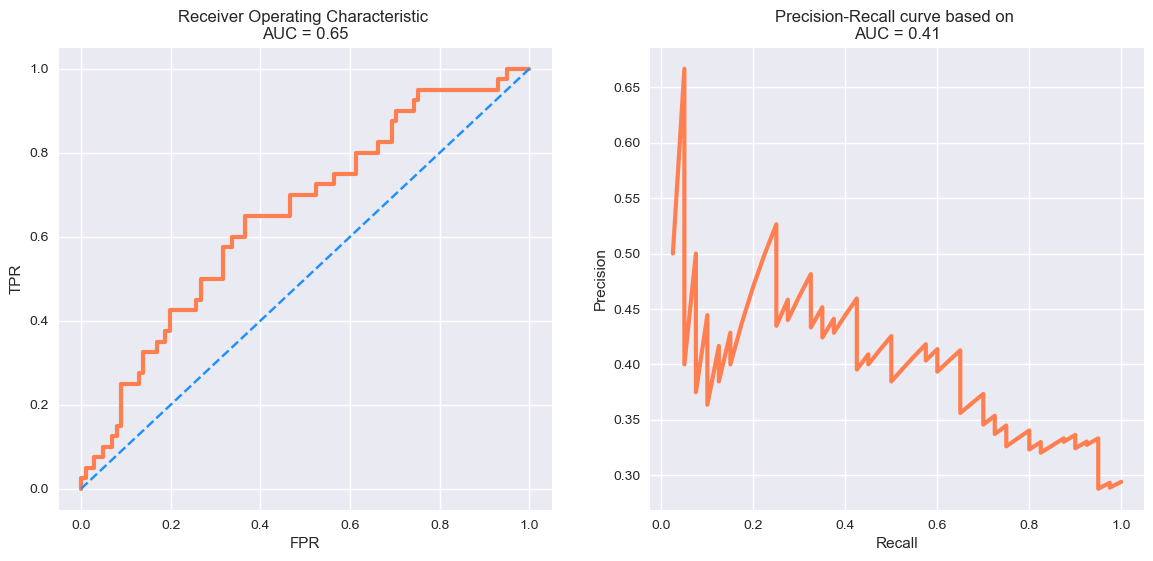

In [7]:
plt.figure(figsize=(14, 6))
plt.subplot(121)
#plt.figure(figsize=(14, 6))
plt.title('Receiver Operating Characteristic \nAUC = %0.2f'% auc_svc)   
plt.plot(fpr, tpr, c='coral', lw=3)
plt.plot([0,1],[0,1], c='dodgerblue', ls='--')
plt.ylabel('TPR'); plt.xlabel('FPR')

plt.subplot(122)
plt.title('Precision-Recall curve based on \nAUC = %0.2f'% pr_auc)
plt.plot(recall[:-2], precision[:-2], c='coral', lw=3)
plt.xlabel('Recall'); plt.ylabel('Precision')
plt.show()